In [8]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat
import tensorflow as tf
import cv2, os

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Function to preprocess the image
def preprocess_image(image):
    # Apply any necessary preprocessing steps such as denoising or contrast enhancement
    
    return image

In [11]:
# Function to segment the filled volume using GrabCut
def segment_image(image):
    # Convert the image to color (3-channel)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Initialize the mask and background model
    mask = np.zeros(image.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    # Define the bounding rectangle for GrabCut
    rect = (50, 50, image.shape[1] - 50, image.shape[0] - 50)

    # Apply GrabCut algorithm
    cv2.grabCut(image_rgb, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Create a 3-channel mask
    mask3 = np.zeros_like(image_rgb)
    mask3[:, :, 0] = mask
    mask3[:, :, 1] = mask
    mask3[:, :, 2] = mask

    # Apply the mask to the image using bitwise AND
    segmented_image = cv2.bitwise_and(image_rgb, mask3)

    # Draw the rectangle on the image
    cv2.rectangle(segmented_image, (rect[0], rect[1]), (rect[2], rect[3]), (0, 255, 0), 2)

    return segmented_image

In [12]:
# Function to calculate the percentage of filled volume
def calculate_filled_volume_percentage(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate the percentage of white pixels (filled volume)
    total_pixels = gray.size
    white_pixels = np.count_nonzero(gray)
    percentage = (white_pixels / total_pixels) * 100
    
    return percentage

In [13]:
# Function to calculate the average percentage of filled volume
def calculate_average_filled_volume_percentage(images):
    total_percentage = 0
    
    for idx, image in enumerate(images):
        # Preprocess the image
        processed_image = preprocess_image(image)
        
        # Segment the filled volume
        segmented_image = segment_image(processed_image)
        
        # Calculate the percentage of filled volume
        filled_volume_percentage = calculate_filled_volume_percentage(segmented_image)
        
        # Accumulate the percentage
        total_percentage += filled_volume_percentage
        
        # Display the original image with the rectangle bounding box
        fig, ax = plt.subplots()
        ax.imshow(image, cmap='gray')
        
        # Draw the rectangle on the plot
        rect = plt.Rectangle((50, 50), image.shape[1] - 100, image.shape[0] - 100,
                             linewidth=2, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        
        plt.title(f'Image {idx+1}')
        plt.axis('off')
        plt.show()
    
    # Average the percentage across all images
    average_percentage = total_percentage / len(images)
    
    return average_percentage

In [14]:
# Load the images
image_files = ['image1.jpeg', 'image2.jpeg', 'image3.jpeg', 'image4.jpeg']
images = []

for file in image_files:
    image = cv2.imread(os.path.join('/home/rijul/Desktop/Projects new/volume/',file), cv2.IMREAD_GRAYSCALE)
    images.append(image)

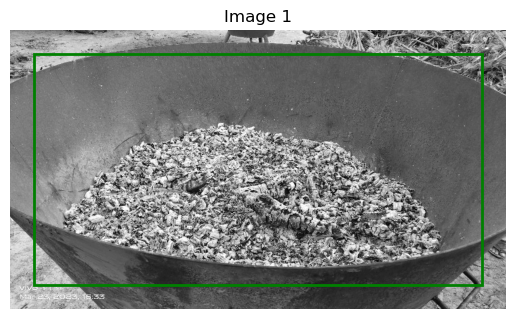

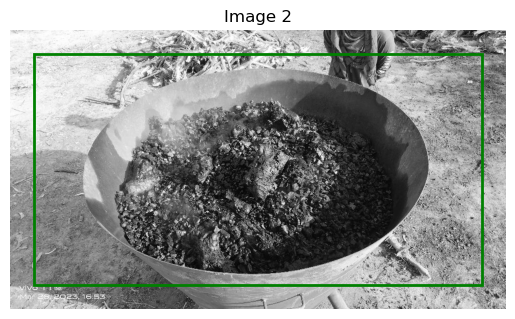

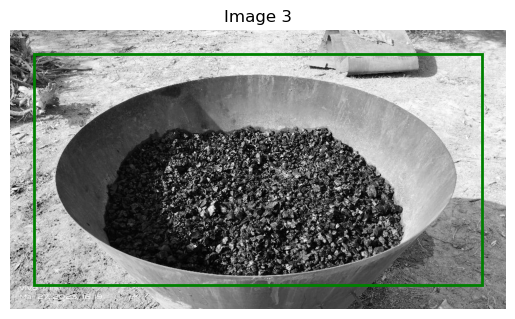

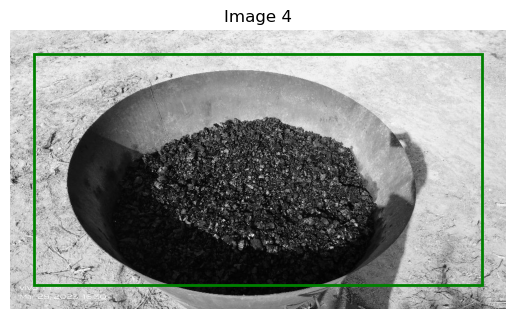

In [15]:
# Calculate the average percentage of filled volume
average_filled_volume_percentage = calculate_average_filled_volume_percentage(images)

In [16]:
# Print the result
print(f"Average Filled Volume Percentage = {average_filled_volume_percentage:.2f}%")

Average Filled Volume Percentage = 55.86%
